In [1]:
# Import Libraries
# Main Libraries
import pandas as pd
import numpy as np

# Viz Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

## Questions To Answer:
- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

---
For each question, make sure to:

State your Null Hypothesis and Alternative Hypothesis
Select the correct test according to the data type and number of samples
Test the assumptions of your selected test.
Execute the selected test, or the alternative test (if you do not meet the assumptions)
Interpret your p-value and reject or fail to reject your null hypothesis 
Show a supporting visualization that helps display the result


In [2]:
# Load df insurance data
df = pd.read_csv('Data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Q1. Do smokers have higher insurance chargers than non-smokers?

1. - Null Hypothesis: There is **no difference** between insurance costs for smokers and non-smokers. 

   - Alt. Hypothesis: There **is a difference** between insurance costs between smokers and non-smokers.

In [3]:
# Create two different tables, one for confirmed smokers & charges, 
# & one for non-smokers with charges

In [4]:
# Only target columns smoker and charges for this question
is_smoker = df.loc[df['smoker']=='yes', ['smoker', 'charges']]
is_smoker.head()

,smoker,charges
0,yes,16884.9240
11,yes,27808.7251
14,yes,39611.7577
19,yes,36837.4670
23,yes,37701.8768


In [5]:
non_smoker = df.loc[df['smoker']=='no', ['smoker', 'charges']]
non_smoker.head()

,smoker,charges
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520
5,no,3756.62160


In [6]:
# create visualization plot for smoker vs non-smoker
viz_df = pd.concat([is_smoker, non_smoker])
viz_df

,smoker,charges
0,yes,16884.9240
11,yes,27808.7251
14,yes,39611.7577
19,yes,36837.4670
23,yes,37701.8768
...,...,...
1332,no,11411.6850
1333,no,10600.5483
1334,no,2205.9808
1335,no,1629.8335


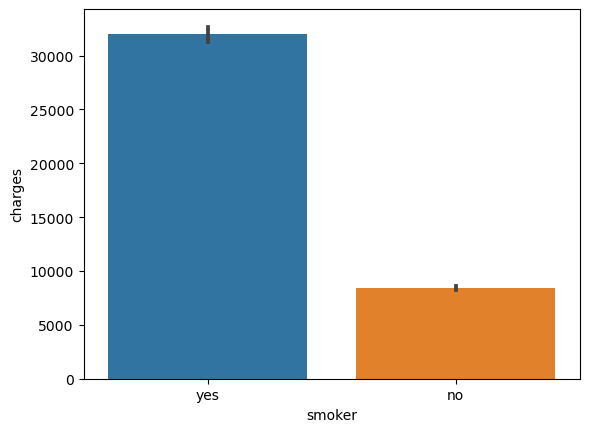

In [10]:
# Create visualization comparing charges for insurance between smokers and non-smokers
sns.barplot(data=viz_df, x='smoker', y='charges', errorbar=('ci', 68));

In [11]:
# find length of values for both smokers and non-smokers
len(is_smoker)

274

In [12]:
len(non_smoker)

1064

In [13]:
# test for any outliers in data using groups
smoker_group = is_smoker['charges']
non_smoker_group = non_smoker['charges']

smoker_group_outliers = np.abs(stats.zscore(smoker_group)) > 3
non_smoker_group_outliers = np.abs(stats.zscore(non_smoker_group)) > 3

# display both outliers for each group
display(smoker_group_outliers.sum(), non_smoker_group_outliers.sum())

0

24

Outliers for **smoker_group** : 0

Outliers for **non_smoker_group** : 24

In [14]:
# remove outliers for the non_smoker_group
non_smoker_group = non_smoker_group.loc[~non_smoker_group_outliers]

### Check for normality, pvalue, variance, etc.

In [22]:
normality_results = stats.levene(smoker_group, non_smoker_group)
print(normality_results)
if normality_results.pvalue < 0.05:
    print("No equal variance between both groups")
else:
    print("Equal variance between both groups")

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)
No equal variance between both groups


#### Run a Welch's T-Test to check final hypothesis

In [23]:
final_results = stats.ttest_ind(smoker_group, non_smoker_group, equal_var=False)
print(final_results)
final_results.pvalue < 0.05

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)


True

## Q1: Final Result
Based on the p_value for the final result being **< 0.05**, we can officially reject the null hypothesis and fail to reject the alternative hypothesis.

- Our answer to Question 1 is:

Alt. Hypothesis: There is a difference between insurance costs between smokers and non-smokers.
    

# Q2: Are men more likely to smoke than women?

---

**Null Hypothesis**: There is no difference between the likelihood of men/women smoking habits.

**Alt. Hypothesis**: There is a difference of smoking habits between men and women.

---

There are **4** sample groups to account for: each gender (male/female) and smoking habits (yes/no)

In [27]:
# create male gender smoker groups
male_group = df.loc[df['sex']=='male', ['sex', 'smoker']]
male_group.head(10)

#created group for males that both smoke and don't smoke

,sex,smoker
1,male,no
2,male,no
3,male,no
4,male,no
8,male,no
10,male,no
12,male,no
14,male,yes
15,male,no
17,male,no


In [28]:
## create female gender smoker groups
female_group = df.loc[df['sex']=='female', ['sex', 'smoker']]
female_group.head(10)

,sex,smoker
0,female,yes
5,female,no
6,female,no
7,female,no
9,female,no
11,female,yes
13,female,no
16,female,no
20,female,no
21,female,no


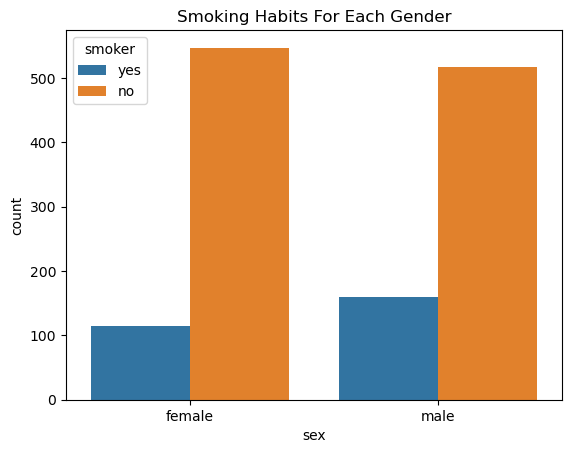

In [31]:
## Create a countplot to show all 4 sample groups
ax = sns.countplot(data = df, x='sex', hue='smoker')
ax.set_title('Smoking Habits For Each Gender');

Since there are more than 2 sample groups, and it is categorical data that is being used. A chi-test is needed which requires a contingency table.

In [33]:
contingency_table = pd.crosstab(df['sex'],df['smoker'])
contingency_table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [35]:
# run the chi-test with the created contingency_table
final_result = stats.chi2_contingency(contingency_table)
chi2, p, deg_free, expected_vals = final_result # this labels the results

In [36]:
print(p)
p<0.05

0.006548143503580696


True

## Q2 Final Results:

The p-value on the chi-test was **less than 0.05** so we can fail to reject the alternative hypothesis.

**Alt. Hypothesis**: There is a difference of smoking habits between men and women.





# Q3. Do different regions have different charges, on average?

---

- Numerical Data
- Multiple Sample Groups

---

**Null Hypothesis**: No charge difference based on regions.

**Alt. Hypothesis**: Is a difference between charges based on regions.

In [37]:
# seperate into groups
groups = {}
for region in df['region'].unique():
    region_charge_df = df.loc[df['region']==region, 'charges']
    groups[region] = region_charge_df
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

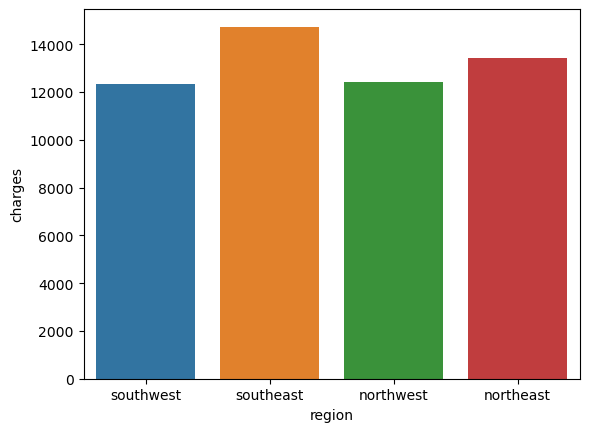

In [39]:
# Create a barplot with the seperated groups based on regions
sns.barplot(data = df, x='region', y='charges', errorbar=None);

In [40]:
# find and remove outliers
for region, data in groups.items():
    outliers = np.abs(stats.zscore(data)) > 3
    print(f'{outliers.sum()} outliers were removed from the {region} group')
    groups[region] = data.loc[~outliers]

8 outliers were removed from the southwest group
2 outliers were removed from the southeast group
7 outliers were removed from the northwest group
4 outliers were removed from the northeast group


In [41]:
# test for normality
results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    results[i] = {'n':len(data),
                 'p':p}

In [43]:
# create dataframe from normality test results
pd.DataFrame(results).T

,n,p
southwest,317.0,7.728611e-22
southeast,362.0,1.936990e-13
northwest,318.0,2.940543e-19
northeast,320.0,3.557877e-17


In [44]:
# add whether there is significant different between each region p values and n values
normality_df = pd.DataFrame(results).T
normality_df['sig?'] = normality_df['p'] < 0.05
normality_df

,n,p,sig?
southwest,317.0,7.728611e-22,True
southeast,362.0,1.936990e-13,True
northwest,318.0,2.940543e-19,True
northeast,320.0,3.557877e-17,True


In [46]:
# test groups for equal variance
statistic, pvalue = stats.levene(*groups.values())
print(statistic, pvalue)
if pvalue < 0.05:
    print('The groups DO NOT have equal variance')
else:
    print('The groups DO have equal variance')

9.518349004554441 3.2035503711783993e-06
The groups DO NOT have equal variance


In [47]:
# final results hypothesis with a Kruskal test
statistic, pvalue = stats.kruskal(*groups.values())
print(statistic, pvalue)

6.914045702545643 0.07468847911322242


The p-value is **greater than 0.05**, so we fail to reject the Null Hypothesis.

**Null Hypothesis**: No charge difference based on regions.